In [1]:
from sklearn.decomposition import PCA
from model import main, parse_args
import argparse

# Define the arguments you want to pass
args = argparse.Namespace(
    BATCH_SIZE=8,
    BLOCK_SIZE=16,
    DROPOUT=0.3,
    LEARNING_RATE=0.0001,
    EPOCHS=1000,
    FRAMES_GENERATE=300,
    TRAIN=True,
    EVAL_EVERY=1000,
    CHECKPOINT_PATH="checkpoints/proto8_checkpoint.pth",
    L1_LAMBDA=None,
    L2_REG=0.0,
    FINETUNE=False,
    FINE_TUNING_LR=1e-5,
    FINE_TUNING_EPOCHS=100000,
    PENALTY=False,
    LATENT_VIS_EVERY=1000,
    
    # NOTES---------------------------------
    notes = f"""Proto8 - trying to adapt Pette et al 2019, addign latent visualisation and analysing latent space. Might be slow, maybe take this out when live.

    All data, added 10% noise to emotions so model is less stuck. With LeakyRelu
    Loss = mse_loss(keypoints) + mse_loss(emotions) because before output emotions ( which feature was added to keypoint features) were not being matched to input emotions
    No penalty.

    Added dropout to keypoints, also changed input to emotion linear to x and not just emotion (emotion + keypoints)
    Taking extra dropout for emotions and keypoints out, because want model to rely on both equally so what's the point

    dropout keypoints and dropout emotion is currently equal but might change this.

    Emotions and keypoints are multimodal and added separately, but features are added in block processing using +.


    Got rid of both L1 and L2, increasing dropout because model acting weird, this is now delta + coord. 
    Delta is between next frame and current frame. So current frame is previous coord+previous delta. Last frame's delta is 0. 
    """
)

latent_space, train_seed = main(args)




C:\Users\avika\OneDrive\Documents\UAL\interactive_dance_thesis

    Batch size set to: 8
    Block size set to: 16
    Dropout rate set to: 0.3
    Learning rate set to: 0.0001
    Number of epochs set to: 1000
    Frames to generate set to: 300
    Training mode set to: True
    Evaluation every set to: 1000
    Checkpoint path set to: checkpoints/proto8_checkpoint.pth
    L1 regularization lambda set to: None
    L2 regularization lambda set to: 0.0
    Fine-tuning mode set to: False
    Fine-tuning learning rate set to: 1e-05
    Fine-tuning epochs set to: 100000
    Penalty flag set to: False
    Latent visualization every set to: 1000
    
Preparing data for all...


100%|██████████| 4102/4102 [00:03<00:00, 1045.21it/s]


Validating interpolation...
No errors found!


4102it [00:01, 2460.45it/s]
4102it [00:01, 2347.44it/s]
100%|██████████| 109/109 [00:06<00:00, 16.06it/s]


Validating interpolation...
No errors found!


109it [00:00, 291.40it/s]
109it [00:00, 286.44it/s]


Creating keypoint frames...


100%|██████████| 4211/4211 [00:03<00:00, 1201.62it/s]


Creating keypoint frames...


100%|██████████| 4211/4211 [00:03<00:00, 1258.20it/s]


Validating length of dkp_frames
Validating length of kp_frames
Adding deltas to frames...


4211it [00:03, 1062.24it/s]


Validating length of data after delta
frame_dim: 100
Training model 14689...


Training:   0%|          | 0/1000 [00:00<?, ?epoch/s]

Evaluating loss...


Training:   0%|          | 4/1000 [00:03<10:46,  1.54epoch/s]


Train loss: 1.676808 val loss: 1.660571


Training: 100%|██████████| 1000/1000 [00:46<00:00, 21.52epoch/s]


No validation losses to save!
Generating sequence of 300 frames...
Creating directory D:\Interactive Dance Thesis Tests\TransformerResults\14689


Visualizing frames: 100%|██████████| 300/300 [00:32<00:00,  9.15it/s]


Notes saved to D:\Interactive Dance Thesis Tests\TransformerResults\14689\notes_1.txt
Done!


ValueError: Found array with dim 3. PCA expected <= 2.

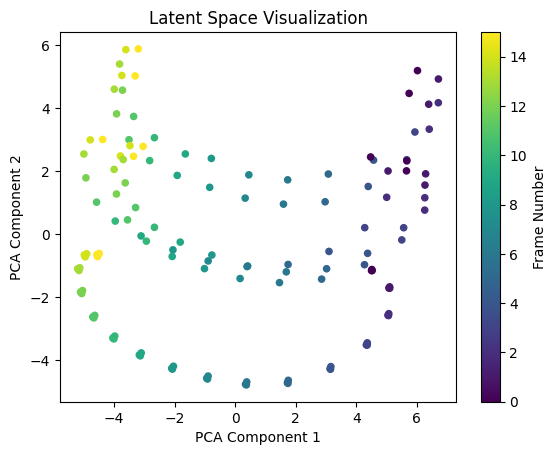

In [11]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Suppose latent_space has shape (n_sequences, n_samples, n_features)
# You need to reshape it to (n_sequences * n_samples, n_features)
n_sequences, n_samples, n_features = latent_space.shape
latent_space_reshaped = latent_space.reshape(n_sequences * n_samples, n_features)

# Now you can apply PCA
pca = PCA(n_components=2)
latent_vectors_2d = pca.fit_transform(latent_space_reshaped)

# Generate the corresponding frame numbers
# This assumes each sequence is a continuous range of frame numbers
frame_numbers = np.tile(np.arange(n_samples), n_sequences)

# Now you can plot the PCA-reduced data, coloring by frame number
plt.scatter(latent_vectors_2d[:, 0], latent_vectors_2d[:, 1], c=frame_numbers, cmap='viridis', s=20)
plt.colorbar(label='Frame Number')
plt.title('Latent Space Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
